In [1]:
import warnings 
warnings.filterwarnings("ignore")

### Importing Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Loading the dataset

In [165]:
df_train = pd.read_csv("train_E1GspfA.csv")
df_train

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81
...,...,...,...
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104


In [166]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [167]:
df_test = pd.read_csv("test_6QvDdzb.csv")
df_test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


### Data Manipulation

In [168]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [169]:
df_train['year'] = df_train['date'].dt.year
df_train['day'] = df_train['date'].dt.day
df_train['month'] = df_train['date'].dt.month

In [170]:
df_train.head()

,date,hour,demand,year,day,month
0,2018-08-18,9,91,2018,18,8
1,2018-08-18,10,21,2018,18,8
2,2018-08-18,13,23,2018,18,8
3,2018-08-18,14,104,2018,18,8
4,2018-08-18,15,81,2018,18,8


In [171]:
mean = df_train['demand'].mean()
mean

73.99145064942182

In [172]:
std_dev = df_train['demand'].std()
std_dev

41.678987983966174

In [178]:
min_outlier = mean - 1*std_dev
min_outlier

32.31246266545565

In [179]:
max_outlier = mean + 1*std_dev
max_outlier

115.67043863338799

In [180]:
dem_no_outlier = df_train['demand'][(df_train['demand']>int(min_outlier)) & (df_train['demand']<int(max_outlier))]

### Exploratory Data Analysis

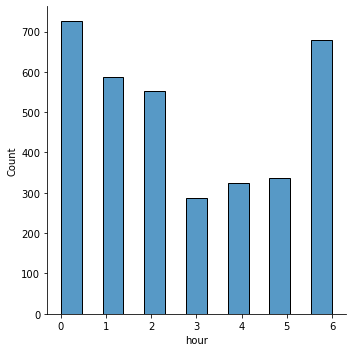

In [15]:
sns.displot(data=df_train, x=df_train['hour'][df_train['hour']<7], kind="hist")

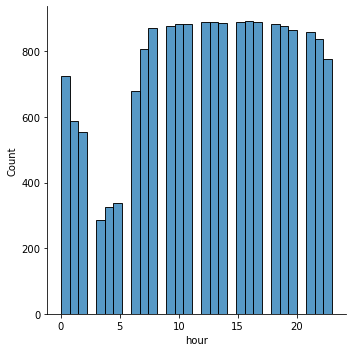

In [16]:
sns.displot(data=df_train, x='hour')

<li>The histplot on hour shows that the <B>count</B> of hours are <B>less between 3 to 5 hours</B> and more than 5 hour are very similiar in count</li>

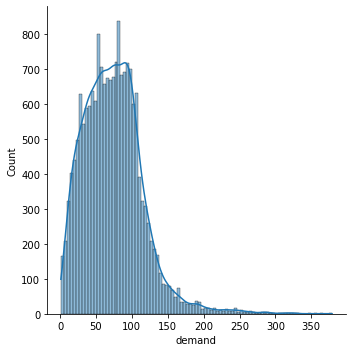

In [182]:
sns.displot(data=df_train, x='demand', kde=True)

<li>The kde plot on demand shows that it look like a bell shaped curve with right skewness, very few values of high values are at the right side. </li>

<AxesSubplot:xlabel='demand'>

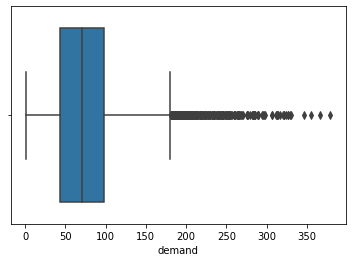

In [183]:
sns.boxplot(data=df_train, x=df_train["demand"])

<AxesSubplot:xlabel='demand'>

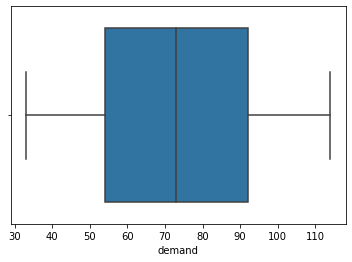

In [184]:
sns.boxplot(data=df_train, x=dem_no_outlier)

<AxesSubplot:xlabel='hour'>

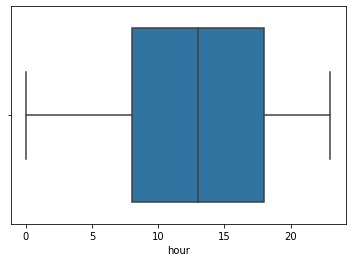

In [20]:
sns.boxplot(data=df_train, x='hour')

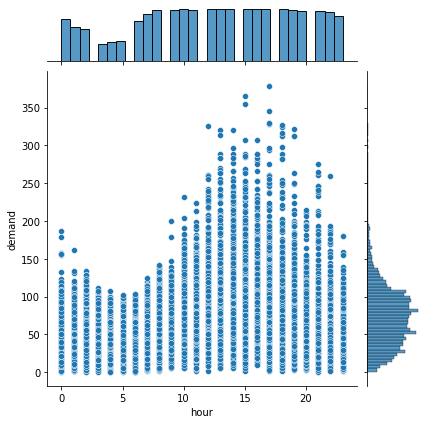

In [21]:
sns.jointplot(x='hour', y='demand', data=df_train, kind = 'scatter')

<AxesSubplot:>

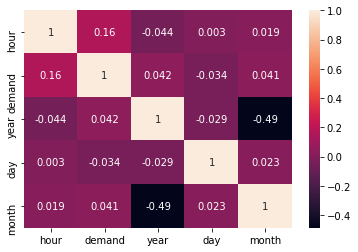

In [22]:
plt.figure()
sns.heatmap(df_train.corr(), annot = True)

### creating another dataframe

In [375]:
df = pd.DataFrame({"month":df_train['month'], "day":df_train['day'], "hour": df_train['hour'],"demand":dem_no_outlier})

In [378]:
df

,month,day,hour,demand
0,8,18,9,91.0
1,8,18,10,73.0
2,8,18,13,73.0
3,8,18,14,104.0
4,8,18,15,81.0
...,...,...,...,...
18242,2,28,19,95.0
18243,2,28,20,88.0
18244,2,28,21,39.0
18245,2,28,22,104.0


In [377]:
# filling the nan values in the demand column.
df['demand'] = df['demand'].fillna(df['demand'].median())

### Standardizing values

In [542]:
#from sklearn.preprocessing import StandardScaler   # preprocessing the values to standarscale using sklearn

#scaler = StandardScaler() # Creating object for model

#df_num =pd.DataFrame(scaler.fit_transform(df),columns = df.columns)# fit the df to scale the values into similar dimensions.

#df_num.head()

### Input and target split

In [379]:
x = df[['hour',"day", "month"]]      # x is the input features with independent variables.

y = df['demand']      # y is the target feature with dependent variable.

### Train Test Split

In [517]:
from sklearn.model_selection import train_test_split   #only changing train_size remember

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.60, random_state = 40)

In [518]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10948, 3) (10948,)
(7299, 3) (7299,)


$$Training\ a\ Model $$

### LinearRegression Algorithmn

In [519]:
from sklearn.linear_model import LinearRegression

li_reg = LinearRegression()

li_reg.fit(X_train, y_train)

LinearRegression()

In [520]:
# predicting the input data.
y_test_pred = li_reg.predict(X_test) 

In [521]:
# creating a dataframe of actual and predicted values with target and predited values.
li_reg_temp_df = pd.DataFrame({"Actual":y_test, "Predict":y_test_pred})
li_reg_temp_df.head()

,Actual,Predict
9643,74.0,73.540818
1381,73.0,72.842874
6871,49.0,72.738158
6878,73.0,70.415427
3929,101.0,71.016878


In [522]:
from sklearn import metrics

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  19.16892519076262


### KNeighborsRegressor Algorithmn

In [523]:
from sklearn.neighbors import KNeighborsRegressor

KNN_reg = KNeighborsRegressor()

KNN_reg.fit(X_train, y_train)   # learn from available data

KNeighborsRegressor()

In [524]:
y_test_pred = KNN_reg.predict(X_test)

In [525]:
Knn_temp_df = pd.DataFrame({"Actual": y_test, "Predict":y_test_pred})
Knn_temp_df.head()

,Actual,Predict
9643,74.0,67.6
1381,73.0,75.2
6871,49.0,71.8
6878,73.0,67.8
3929,101.0,64.6


In [526]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  20.826278098421692


### DecisionTreeRegressor Algorithmn

In [527]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [528]:
y_test_pred = dt_reg.predict(X_test)

In [529]:
dt_temp_df = pd.DataFrame({"Actual": y_test, "Predict":y_test_pred})
dt_temp_df.head()

,Actual,Predict
9643,74.0,66.0
1381,73.0,73.0
6871,49.0,73.0
6878,73.0,73.0
3929,101.0,80.0


In [530]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  26.118541340058655


### RandomForestRegressor Algorithmn

In [531]:
from sklearn.ensemble import RandomForestRegressor
rndf_reg = RandomForestRegressor()
rndf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [532]:
y_test_pred = rndf_reg.predict(X_test)

In [533]:
rndf_temp_df = pd.DataFrame({"Actual": y_test, "Predict":y_test_pred})
rndf_temp_df.head()

,Actual,Predict
9643,74.0,63.557333
1381,73.0,72.780000
6871,49.0,70.823500
6878,73.0,67.071667
3929,101.0,64.725333


In [534]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  21.93654258417142


<AxesSubplot:xlabel='Actual', ylabel='Predict'>

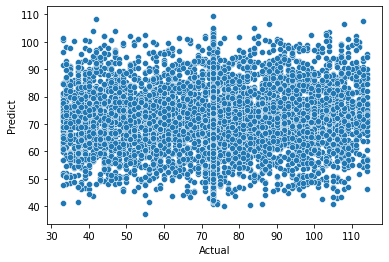

In [535]:
sns.scatterplot(data= rndf_temp_df, x='Actual', y="Predict")

### Submission_file 

In [536]:
sub_file = pd.read_csv("sample_4E0BhPN.csv")
sub_file

,date,hour,demand
0,2021-03-01,0,0
1,2021-03-01,1,0
2,2021-03-01,2,0
3,2021-03-01,3,0
4,2021-03-01,5,0
...,...,...,...
7645,2022-03-28,19,0
7646,2022-03-28,20,0
7647,2022-03-28,21,0
7648,2022-03-28,22,0


In [537]:
li_reg_temp_df['Predict']

9643     73.540818
1381     72.842874
6871     72.738158
6878     70.415427
3929     71.016878
           ...    
6043     72.747413
9575     72.690262
13727    71.500007
6804     72.259048
14708    73.192970
Name: Predict, Length: 7299, dtype: float64

In [538]:
# Assigning the predicted values to the demand for hour.
sub_file['demand'] = li_reg_temp_df['Predict']

In [539]:
sub_file

,date,hour,demand
0,2021-03-01,0,NaN
1,2021-03-01,1,72.345475
2,2021-03-01,2,NaN
3,2021-03-01,3,72.935569
4,2021-03-01,5,NaN
...,...,...,...
7645,2022-03-28,19,71.810283
7646,2022-03-28,20,71.957806
7647,2022-03-28,21,NaN
7648,2022-03-28,22,NaN


In [540]:
sub_file['demand'] = sub_file['demand'].fillna(sub_file['demand'].median())

In [541]:
sub_file.to_csv("li_reg_submission_file.csv", index=False)